# Introduction to Artificial Neural Networks 
by Shawn Rhoads, Georgetown University (NSCI 526)
<br>(adapted from [Shamdasani](https://dev.to/shamdasani/build-a-flexible-neural-network-with-backpropagation-in-python))
***
Recall from class, artificial neural networks are typically organized into three main layers: the input layer, the hidden layer, and the output layer. There are several inputs (also called <i>features</i>) that produce output(s) (also called a <i>label(s)</i>)

In a feed forward network information always moves one direction without cycles/loops in the network; it never goes backwards ([Wikipedia](https://en.wikipedia.org/wiki/Feedforward_neural_network)):
![Feedforward Neural Net](https://thedatamage.com/wp-content/uploads/2018/08/0_0mia7BQKjUAuXeqZ.jpeg)

Above, the circles represent "neurons" while the lines represent "synapses". The role of a synapse is to take the multiply the inputs and weights. You can think of weights as the "strength" of the connection between neurons. Weights primarily define the output of a neural network. However, they are highly flexible. After, an activation function is applied to return an output.

## Here's a brief overview of how a simple feedforward neural network works:
1. Takes inputs as a matrix (2D array of numbers)
2. Multiplies the input by a set weights (performs a dot product aka matrix multiplication)
3. Applies an activation function
4. Returns an output
5. Error is calculated by taking the difference from the desired output from the data and the predicted output. This creates our gradient descent, which we can use to alter the weights
6. The weights are then altered slightly according to the error.
7. To train, this process is repeated 1,000+ times. The more the data is trained upon, the more accurate our outputs will be.

> "They just perform a dot product with the input and weights and apply an activation function. When weights are adjusted via the gradient of loss function, the network adapts to the changes to produce more accurate outputs."
><br/><br/>(via [Shamdasani](https://dev.to/shamdasani/build-a-flexible-neural-network-with-backpropagation-in-python))

## What does this mean?

Let's model a single hidden later with three inputs and one output. In the network, we will be predicting the score of our exam based on the inputs of how many hours we studied and how many hours we slept the day before. Our test score is the output. Here's our sample data of what we'll be training our Neural Network on: 

In [1]:
import numpy as np

We will want to predict the test score of someone who studied for four hours and slept for eight hours based on their prior performance.

Our inputs (`X`) are in hours. Our output (`y`) is a test score from 0-100. Therefore, we need to scale our data by dividing by the maximum value for each variable.

In [2]:
# X = (hours studying, hours sleeping), y = score on test
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array((92, 86, 89), dtype=float)

# scale units
X_max = np.amax(X, axis=0)
X = X/X_max # maximum of X array
y = y/100 # max test score is 100

# print
print('[Hours studied, Hours slept]')
print(X.view())

print('\n[Scores on test]')
print(y.view())

[Hours studied, Hours slept]
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

[Scores on test]
[0.92 0.86 0.89]


Synapses perform a dot product of the input and weight. For our first calculation, we will generate random weights between 0 and 1.

Our input data, `X`, is a 3x2 matrix. Our output data, `y`, is a 3x1 matrix. Each element in matrix `X` needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron in the hidden layer. 

First, the products of the random generated weights (.2, .6, .1, .8, .3, .7) on each synapse and the corresponding inputs are summed to arrive as the first values of the hidden layer. 

In [3]:
W1 = np.array(([.2, .6, .1], [.8, .3, .7]), dtype=float)
W2 = np.array([.4, .5, .9], dtype=float)

Here's how the first input data element (2 hours studying and 9 hours sleeping) would calculate an output in the network:

![Example algorithm](./images/feedforward_net_small.png)

Here is our first calculation for the hidden layer above:

$\begin{align*} \mathbf{X_{1}} \cdot \mathbf{W1} &= \begin{bmatrix} x_{11} & x_{12} \end{bmatrix} \cdot \begin{bmatrix} w_{11} & w_{12} & w_{13}  \\ w_{21} & w_{22} & w_{23} \end{bmatrix} \\ \\ &= \begin{bmatrix} x_{12}w_{11} + x_{12}w_{21} & x_{12}w_{12} + x_{12}w_{22} & x_{12}w_{13} + x_{12}w_{23} \end{bmatrix} \\ \\ &= \begin{bmatrix} .67 & 1 \end{bmatrix} \cdot \begin{bmatrix} .2 & .6 & .1  \\ .8 & .3 & .7 \end{bmatrix} \\ \\ &= \begin{bmatrix} (.67*.2 + 1*.8) & (.67*.6 + 1*.3) & (.67*.1 + 1*.7) \end{bmatrix} \\ \\ &= \begin{bmatrix} 0.93 & 0.70 & 0.77 \end{bmatrix} \end{align*}$

To obtain the final value for the hidden layer, we need to apply an **activation function**, which will introduce nonlinearity. One advantage of this is that the output is mapped from a range of 0 and 1, making it easier to alter weights in the future.

**Enter the sigmoid function:**

$\begin{align*} f(x) = \frac{1}{1+e^{-\beta x}} \end{align*}$

![Sigmoid](https://miro.medium.com/max/730/1*Sek4P_MzBAipJJpwA8iS7Q.png)

Thus our calculation for the output above:
```
1 / (1 + np.exp(-0.93)) = 0.72
1 / (1 + np.exp(-0.70)) = 0.67
1 / (1 + np.exp(-0.77)) = 0.68
```

Rinse, repeat for output layer:

$\begin{align*} \beta \cdot \mathbf{F} &= \begin{bmatrix} \beta_{11} & \beta_{21} & \beta_{31} \end{bmatrix} \cdot \begin{bmatrix} f_{11} \\ f_{12}  \\ f_{13} \end{bmatrix} \\ \\ &= \begin{bmatrix} (\beta_{11}*f_{11}) + (\beta_{21}*f_{12}) + (\beta_{31}*f_{13}) \end{bmatrix} \\ \\ &= \begin{bmatrix} .4 & .5 & .9 \end{bmatrix} \cdot \begin{bmatrix} .72 \\ .67 \\ .68 \end{bmatrix} = \begin{bmatrix} (.4*.72) + (.5*.67) + (.9*.68) \end{bmatrix} \\ \\ &= 1.24 \end{align*}$

Pass through activation (sigmoid) function:

```
1 / (1 + np.exp(-1.24)) = 0.77
```

Theoretically, our neural network would calculate `.77` as our test score. However, our target was `.92`. Does not perform quite as good as one could hope!

---

## Feedforward Implementation

Now, we are ready to write a forward propagation function. Let's pass in our input, `X`. We can use the variable `z` to simulate the activity between the input and output layers.

Remember, we will need to take a dot product of the inputs and weights, apply the activation function, take another dot product of the hidden layer and second set of weights, and lastly apply a final activation function to recieve our output:

In [4]:
# FORWARD PROPAGATION
def forward(X,W1,W2):
    z = np.dot(X, W1) # dot product of X (input) and first set of 3x2 weights
    print("z=")
    print(z.view())
    print()

    z2 = sigmoid(z) # activation function
    print("z2=")
    print(z2.view())
    print()

    z3 = np.dot(z2, W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    print("z3=")
    print(z3.view())
    print()

    o = sigmoid(z3) # final activation function
    print("o=")
    print(o.view())
    print()

    return z,z2,z3,o

In [5]:
def sigmoid(s):
    # activation function
    return 1/(1+np.exp(-s))

In [6]:
z,z2,z3,o = forward(X,W1,W2)

print("Predicted Output: \n" + str(o))
print("Actual Output: \n" + str(y))

z=
[[0.93333333 0.7        0.76666667]
 [0.51111111 0.36666667 0.42222222]
 [0.73333333 0.8        0.56666667]]

z2=
[[0.71775106 0.66818777 0.68279939]
 [0.62506691 0.59065328 0.60401489]
 [0.67553632 0.68997448 0.63799367]]

z3=
[1.23571376 1.0889668  1.18939607]

o=
[0.77481705 0.74818711 0.76663304]

Predicted Output: 
[0.77481705 0.74818711 0.76663304]
Actual Output: 
[0.92 0.86 0.89]


Notice how terrible this performs! With our simple feedforward network, we aren't able to predict our test scores very well. Why? Our network needs to learn!

---

## Enter Backpropagation

Since we initialize with a random set of weights, we need to alter them to make our inputs equal to the corresponding outputs from our data set. This is done through **backpropagation**, which works by using a **loss function** to calculate how far the network was from the target output. 

Like the activation function, there is no one-size-fits-all loss function. Two common loss functions include: 

__mean absolute error (L1 Loss):__ measured as the average of sum of absolute differences between predictions and actual observations; more robust to outliers since it does not make use of square

$$
MAE = \frac {\sum_{i=1}^n |y_i - \hat{y_i}|}{n}
$$

__mean square error (L2 Loss):__ the average of squared difference between predictions and actual observations; due to squaring, predictions that are far away from actual values are penalized heavily in comparison to less deviated predictions

$$
MSE = \frac {\sum_{i=1}^n (y_i - \hat{y_i})^2}{n}
$$

Using our example: `o` is our predicted output, and `y` is our actual output. Our goal is to get our loss function as close as we can to `0`, meaning we will need to have close to no loss at all. 

Training = minimizing the loss. 

$$
Loss = \frac {\sum (o - y)^2}{2}
$$

## Enter Gradient Descent
To figure out which direction to alter our weights, we need to find the rate of change of our loss with respect to our weights (i.e., we need to use the derivative of the loss function to understand how the weights affect the input):

![gradient descent](https://raw.githubusercontent.com/bfortuner/ml-cheatsheet/master/docs/images/gradient_descent_demystified.png)

*via https://github.com/bfortuner/ml-cheatsheet/blob/master/docs/gradient_descent.rst*

### Here's how we will calculate the incremental change to our weights:
1. Find the margin of error of the output layer `o` by taking the difference of the predicted output and the actual output `y`.
2. Apply the derivative of our sigmoid activation function to the output layer error. We call this result the **delta output sum**.
3. Use the delta output sum of the output layer error to figure out how much our `z2` (hidden) layer contributed to the output error by performing a dot product with our second weight matrix. We can call this the z^2 error.
4. Calculate the delta output sum for the `z2` layer by applying the derivative of our sigmoid activation function (just like step 2).
5. Adjust the weights for the first layer by performing a dot product of the input layer with the **hidden delta output sum**. For the second weight, perform a dot product of the hidden(`z2`) layer and the **output (`o`) delta output sum**.

Calculating the delta output sum and then applying the derivative of the sigmoid function are very important to backpropagation. The derivative of the sigmoid, also known as **sigmoid prime**, will give us the rate of change, or slope, of the activation function at output sum.

---

## Backprop Implementation
Let's continue to code our `Neural_Network` class by adding a `sigmoidPrime` (derivative of sigmoid) function and a `backward` propagation function that performs the four steps above. 

Then, we can define our output through initiating foward propagation and intiate the backward function by calling it in a `train` function: 

In [7]:
# BACKPROPAGATION with Mean Square Error Minimization
def backward(X,W1,W2,y,z,z2,z3,o):
    # backward propgate through the network
    o_error = np.square(y - o) # error in output
    print("Error in output (o_error):")
    print(o_error.view())
    print()

    o_delta = o_error*sigmoidPrime(o)
    print("Applied gradient of sigmoid to error (o_delta):")
    print(o_delta.view())
    print()

    z2_error = o_delta.dot(W2.T) 
    print("How much our hidden layer weights contributed to output error (z2 error):")
    print(z2_error.view())
    print()

    z2_delta = z2_error*sigmoidPrime(z2)
    print("Applied gradient of sigmoid to z2 error (z2_delta):")
    print(z2_error.view())
    print()

    W1_b = W1 + X.T.dot(z2_delta)
    print("Adjusting first set (input --> hidden) weights:")
    print("W1=")
    print(W1_b.view())
    print()

    W2_b = W2 + z2.T.dot(o_delta)
    print("Adjusting second set (hidden --> output) weights:")
    print("W2=")
    print(W2_b.view())
    print()
    
    return W1_b, W2_b

In [8]:
def sigmoidPrime(s):
    #derivative of sigmoid (e.g., gradient)
    return s * (1 - s)

Let's try running one iteration of backpropagation:

In [9]:
print("FORWARD PROPOGATION #1\n")
z,z2,z3,o = forward(X,W1,W2)
print("----------------------\n")
print("BACK PROPOGATION #1\n")
W1_b, W2_b = backward(X,W1,W2,y,z,z2,z3,o)
print("----------------------\n")
print("FORWARD PROPOGATION #2\n")
z,z2,z3,o = forward(X,W1_b,W2_b)

FORWARD PROPOGATION #1

z=
[[0.93333333 0.7        0.76666667]
 [0.51111111 0.36666667 0.42222222]
 [0.73333333 0.8        0.56666667]]

z2=
[[0.71775106 0.66818777 0.68279939]
 [0.62506691 0.59065328 0.60401489]
 [0.67553632 0.68997448 0.63799367]]

z3=
[1.23571376 1.0889668  1.18939607]

o=
[0.77481705 0.74818711 0.76663304]

----------------------

BACK PROPOGATION #1

Error in output (o_error):
[0.02107809 0.01250212 0.01521941]

Applied gradient of sigmoid to error (o_delta):
[0.00367761 0.00235544 0.00272286]

How much our hidden layer weights contributed to output error (z2 error):
0.005099334735433654

Applied gradient of sigmoid to z2 error (z2_delta):
0.005099334735433654

Adjusting first set (input --> hidden) weights:
W1=
[[0.20220476 0.6022555  0.10232058]
 [0.80244211 0.30254275 0.70256718]]

Adjusting second set (hidden --> output) weights:
W2=
[0.40595131 0.50572728 0.90567096]

----------------------

FORWARD PROPOGATION #2

z=
[[0.93724529 0.70404641 0.7707809 ]
 [0.5

Notice how the outputs are much better after implementing backprop twice.. 

---

## Let's train our network!

We will define a python `class` and insert our functions from above. We will add an `init` function where we'll specify our parameters such as the input, hidden, and output layers.

In [10]:
# X = (hours studying, hours sleeping), y = score on test
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

# scale units
X_max = np.amax(X, axis=0)
X = X/X_max # maximum of X array
y = y/100 # max test score is 100

# print
print('[Hours studied, Hours slept]')
print(X.view())

print('\n[Scores on test]')
print(y.view())

[Hours studied, Hours slept]
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

[Scores on test]
[[0.92]
 [0.86]
 [0.89]]


In [11]:
class Neural_Network(object):
    
    def __init__(self):
        #parameters
        self.inputNum = 2 # two inputs
        self.outputNum = 1 # 1 ouput
        self.hiddenNum = 3 # 3 nodes in our hidden layer

        #weights
        np.random.seed(2019) #set random seed for reproducibility
        self.W1 = np.random.randn(self.inputNum, self.hiddenNum) # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenNum, self.outputNum) # (3x1) weight matrix from hidden to output layer
        
    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
        o = self.sigmoid(self.z3) # final activation function
        return o 
    
    def sigmoid(self, s):
        # activation function
        return 1/(1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        #derivative of sigmoid
        return s * (1 - s)

    def backward(self, X, y, o):
        # backward propgate through the network
        self.o_error = np.square(y - o) # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights
        
    def train (self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)
        
    def test(self, X):
        # test using new data
        return self.forward(X)

To run the network, all we have to do is to run the `train` function. 

We will want to do this multiple (e.g., hundreds) of times. So, we'll use a for loop:

In [12]:
NN = Neural_Network()
mse = np.array([]) # let's track how the mean sum squared error goes down as the network learns 

n_iter = 200
for i in range(n_iter): # trains the network n_iter times
    mse = np.append(mse,np.mean(np.square(y - NN.forward(X)))) #store error
    # let's print the output every (n_iter/4) iteration and last:
    if i % (n_iter/4) == 0 or i == (n_iter-1):
        print("Interation: #%i" % (i))
        print("Input: \n" + str(X) )
        print("Actual Output: \n" + str(y)) 
        print("Predicted Output: \n" + str(NN.forward(X)) )
        print("Mean square error: \n" + str(mse[i])) # mean sum squared error
        print("\n")
    NN.train(X, y)

Interation: #0
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.59829797]
 [0.58952764]
 [0.58856997]]
Mean square error: 
0.089169184931786


Interation: #50
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.81578845]
 [0.78576724]
 [0.81093399]]
Mean square error: 
0.0075406612338980985


Interation: #100
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.84301206]
 [0.81213973]
 [0.83894441]]
Mean square error: 
0.0036081405451177857


Interation: #150
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.85560731]
 [0.82459002]
 [0.85190143]]
Mean square error: 
0.002283928756475065


Interation: #199

Observe how the mean sum squared error goes down with each iteration. That's the network learning via gradient descent! 

We can also plot the gradient descent below (notice how quickly it converges):

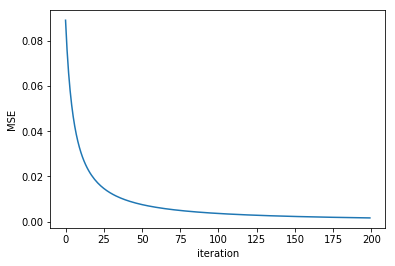

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(range(n_iter), mse)

ax.set(xlabel='iteration', 
       ylabel='MSE')

plt.show()

### Testing our network with new data (validation):
How well does our classifier perform on unseen data? To test how well it performs on new data, let's pretend we split our hours studying/sleeping data into training and testing samples. The example above uses few training samples (N=3) to train our network. Let's use a "testing sample" to validate our neural network model.

In [14]:
X_test = np.array(([2, 8], [1, 4], [2, 4], [3, 8], [1,8], [2,9]), dtype=float)
X_test = X_test/X_max
y_actual = np.array(([.9], [.88], [.91], [.95], [.90], [.92]), dtype=float)

# Test 
y_pred = NN.test(X_test)

print("predicted scores=")
print([round(y_pred[i,0],2) for i in range(len(y_pred))])

print("actual scores=")
print([y_actual[j,0] for j in range(len(y_actual))])

predicted scores=
[0.86, 0.83, 0.84, 0.87, 0.85, 0.86]
actual scores=
[0.9, 0.88, 0.91, 0.95, 0.9, 0.92]


In [15]:
from scipy.stats.stats import pearsonr

accuracy = pearsonr(y_pred,y_actual)
print(str('accuracy = %03.1f%%' % (accuracy[0][0]*100)))

accuracy = 79.2%


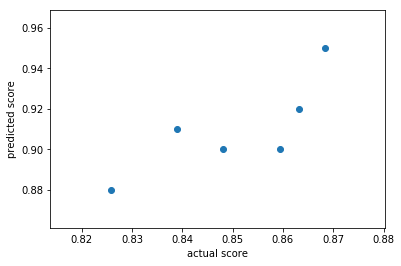

In [16]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_actual)
ax.set(xlabel='actual score',
ylabel='predicted score')
plt.show()